In [ ]:
##### first option (classic way to consume API)

### obtain all the available metrics of the wholesale energy market in Colombia
import requests
import json

url = "http://servapibi.xm.com.co/lists"

body = {"MetricId": "ListadoMetricas"}
data = requests.post(url, json = body)

if data.status_code == 200:
    data = data.json()

print(json.dumps(data, indent = 4))

In [ ]:
##### second option (use the library "pydataxm" using the class methods of ReadDB specified in the repository "https://github.com/EquipoAnaliticaXM/API_XM")

### obtain all the available metrics of the wholesale energy market in Colombia

from pydataxm import *
import pandas as pd

## configurate pandas view
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None
#pd.set_option('display.max_colwidth', 1000)

## create instance
objectAPI = pydataxm.ReadDB()

df = objectAPI.get_collections()
df = pd.DataFrame(df)
df.to_csv("metricas_mercado_mayorista_API_XM.csv")
df

In [ ]:
# por cada metrica nos permite ver desde cuantas entidades podemos consultar, en este caso demanda comercial vista desde el sistema, por agente y mercado de comercialización
objectAPI.get_collections('DemaCome') 

In [ ]:
# para despacho de generación solo tenemos consulta por recurso 
objectAPI.get_collections('GeneProgDesp') 

In [ ]:
import datetime as dt

df_variable = objectAPI.request_data(
    "GeneProgDesp",
    "Recurso",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

df_variable

In [53]:
##### libraries & object xm instance

from pydataxm import *
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

objectAPI = pydataxm.ReadDB()

In [58]:
##### Analisis sistemico del precio de energía Mayorista de colombia en Diciembre 2023

### demand [kWh]
december = objectAPI.request_data(
    "DemaReal",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaReal",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand = pd.concat([december, thirtyone], ignore_index=True)
demand.iloc[:, 2:-1] /= 1000
demand

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,8734.64584,8355.19599,8056.42475,7912.69742,8016.54396,8291.44688,8529.44413,9123.23138,...,10928.21288,10648.69379,10515.23426,11080.04860,11022.73849,10773.86968,10284.80821,9731.51257,9169.49154,2023-12-01
1,Sistema,Sistema,8494.72030,8145.10541,7913.30389,7763.50802,7761.71439,7819.98636,7985.63248,8494.56414,...,9903.71898,9839.16433,9910.17550,10552.46642,10435.07316,10091.77283,9697.57505,9209.58993,8713.07387,2023-12-02
2,Sistema,Sistema,8326.23617,7867.11930,7625.48903,7390.91290,7272.63657,7145.78239,7011.47224,7396.14193,...,9018.39410,8928.59958,9070.79078,9892.71646,10005.19147,9831.12008,9530.90096,9115.38620,8678.04162,2023-12-03
3,Sistema,Sistema,8282.39858,7986.76122,7810.08228,7727.76449,7849.58091,8056.09947,8338.49389,8983.20600,...,11106.65423,10975.74168,10755.27825,11131.01511,11137.32938,10925.66510,10475.20658,9892.84770,9290.99884,2023-12-04
4,Sistema,Sistema,8847.57597,8477.97159,8300.43663,8173.85574,8267.86591,8517.66740,8811.16572,9410.40410,...,11146.95694,11147.84500,10955.48978,11477.88427,11426.60466,11203.66134,10733.02236,10113.37535,9523.59988,2023-12-05
5,Sistema,Sistema,9040.01205,8669.33940,8343.69346,8188.39995,8287.39606,8519.67432,8950.88315,9542.54601,...,11270.89789,11091.39762,10907.74275,11385.77465,11288.04301,11084.75336,10652.16865,10046.38306,9468.56639,2023-12-06
6,Sistema,Sistema,9006.69217,8658.77528,8318.65280,8217.24946,8320.18238,8552.58749,8902.14560,9512.13604,...,10973.72096,10678.47754,10499.56960,10908.58532,10571.51454,10050.42222,9623.97278,9276.45869,8971.64939,2023-12-07
7,Sistema,Sistema,8702.47425,8423.33244,8227.25441,8082.69442,8018.90574,7904.27955,7758.20636,8100.84190,...,9523.84721,9459.61598,9531.06726,10212.25431,10197.92136,10041.57633,9766.81183,9435.86111,9022.27654,2023-12-08
8,Sistema,Sistema,8473.49995,8269.59312,8156.63425,8059.39496,8076.44924,8108.70209,8228.09552,8746.73326,...,10110.70793,10010.10663,10023.37367,10691.14907,10643.02719,10362.06956,9985.59844,9515.18409,9086.54754,2023-12-09
9,Sistema,Sistema,8361.83295,8005.68987,7774.62249,7589.12339,7500.77468,7424.28763,7296.40890,7566.42818,...,9059.28592,9015.55570,9144.48794,9971.67238,10049.84601,9911.63750,9642.17758,9242.33772,8777.84001,2023-12-10


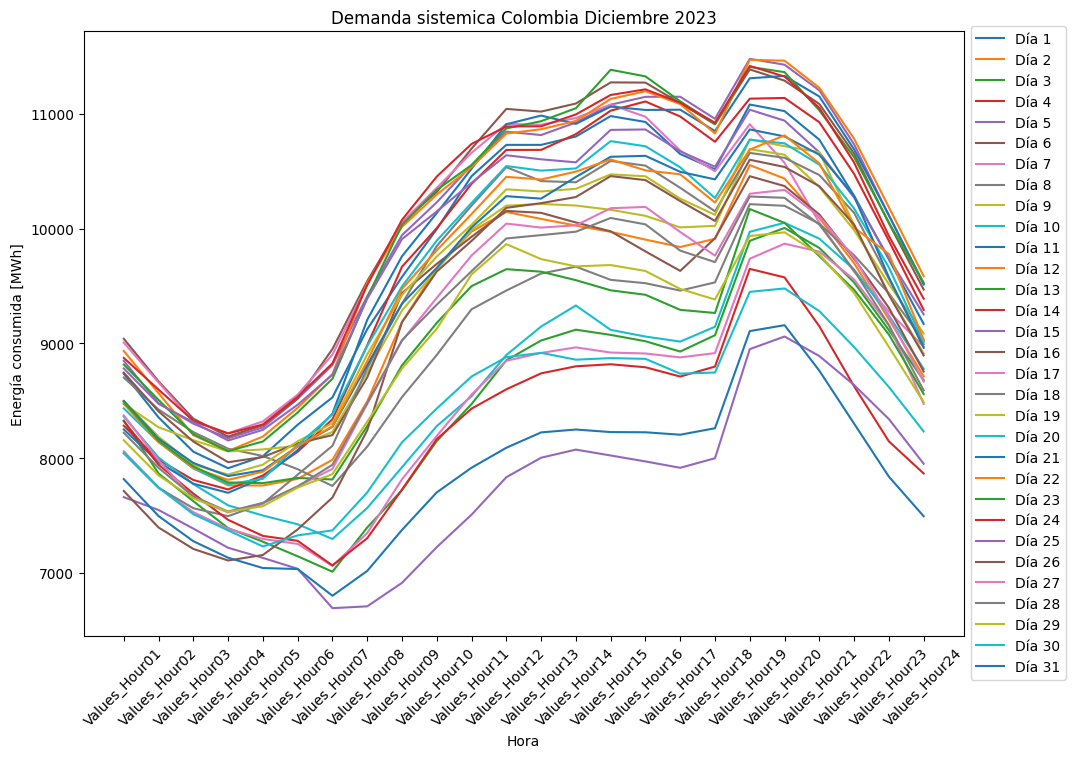

In [102]:
### grafica de la demanda x hora y día
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(len(demand)):
    ax.plot(demand.columns[2:-1], demand.iloc[i, 2:-1], label=f'Día {i+1}')

ax.set_xlabel('Hora')
ax.set_ylabel('Energía consumida [MWh]')
ax.set_title('Demanda sistemica Colombia Diciembre 2023')

fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), ncol=1)
plt.xticks(rotation=45)
plt.show()

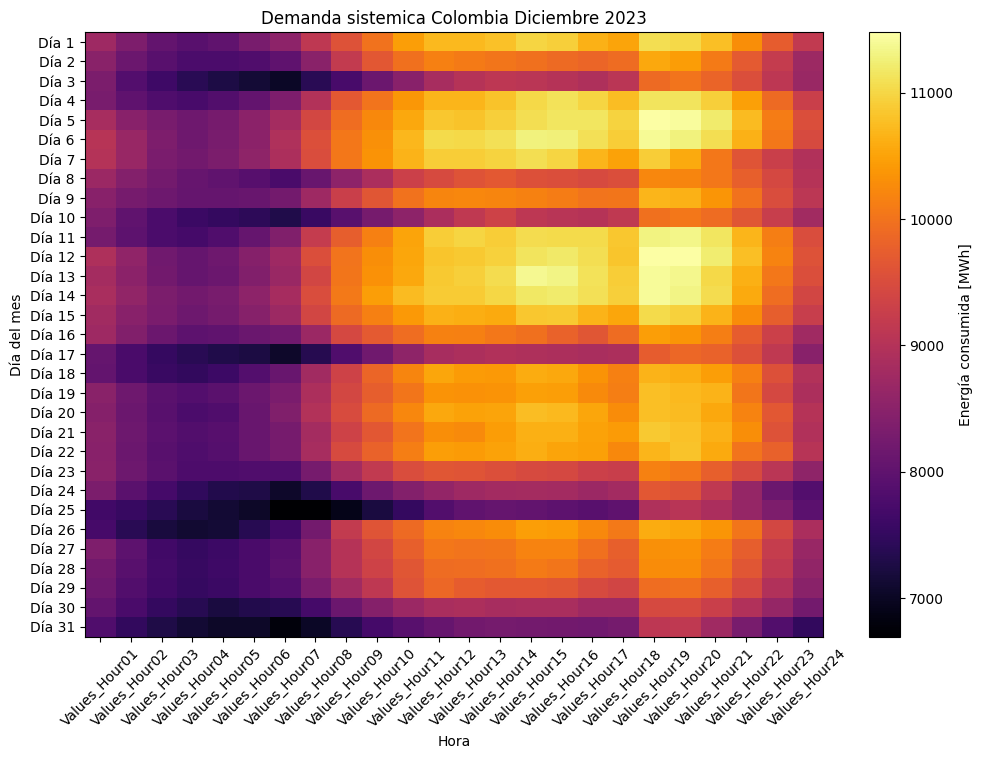

In [87]:
### heat map
values_by_day = demand.iloc[:, 2:-1].values

fig, ax = plt.subplots(figsize=(10, 7))
heatmap = ax.imshow(values_by_day, cmap='inferno', aspect='auto')

ax.set_xlabel('Hora')
ax.set_ylabel('Día del mes')
ax.set_title('Demanda sistemica Colombia Diciembre 2023')

cbar = fig.colorbar(heatmap)
cbar.set_label('Energía consumida [MWh]')

fig.tight_layout()
plt.xticks(np.arange(len(demand.columns[2:-1])), demand.columns[2:-1], rotation=45)
plt.yticks(np.arange(len(demand)), [f'Día {i+1}' for i in range(len(demand))])
plt.show()

In [ ]:
### Demanda Regulados y noRegulados
december = objectAPI.request_data(
    "DemaRealReg",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaRealReg",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand_reg = pd.concat([december, thirtyone], ignore_index=True)

In [ ]:
december = objectAPI.request_data(
    "DemaRealNoReg",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaRealNoReg",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand_noreg = pd.concat([december, thirtyone], ignore_index=True)

In [ ]:
### generation [kWh]
december = objectAPI.request_data(
    "Gene",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "Gene",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

generation = pd.concat([december, thirtyone], ignore_index=True)

### x Resource
decemberxresource = objectAPI.request_data(
    "Gene",
    "Recurso",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyonexresource = objectAPI.request_data(
    "Gene",
    "Recurso",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

generationxresource = pd.concat([decemberxresource, thirtyonexresource], ignore_index=True)
generationxresource


In [ ]:
### stock price [COP/kWh]
december = objectAPI.request_data(
    "PrecBolsNaci",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "PrecBolsNaci",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

stockprice = pd.concat([december, thirtyone], ignore_index=True)
stockprice

In [ ]:
### scarcity price [COP/kWh]
## Precio de Escasez de Activación calculado de acuerdo con la Resolución CREG 140 del 2017
scarcity_activation = objectAPI.request_data(
    "PrecEscaAct",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 1)
)

## Establecido por la CREG- y actualizado mensualmente con base en la variación de un índice de precios de combustibles
scarcity_december = objectAPI.request_data(
    "PrecEsca",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 1)
)

In [ ]:
### Energía Comprada y vendida [kWh] en Bolsa para atender la demanda

december = objectAPI.request_data(
    "CompBolsNaciEner",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "CompBolsNaciEner",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

purchased_energy = pd.concat([december, thirtyone], ignore_index=True)
purchased_energy